In [ ]:
! pip install natsort
! pip install numpy==1.26.4
! pip install pandas==2.2.3
! pip install elapid

In [1]:
# importiamo le librerie necessarie
import warnings
from pprint import pprint
from glob import glob
import pandas as pd
import numpy as np
import elapid as ela
from elapid import MaxentModel, sample_bias_file
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics
import rasterio
from rasterio.mask import mask
import json
import natsort
import geopandas as gpd
import os

In [2]:
# Open the raster file
with rasterio.open(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\chelsa_bio\CHELSA_bio1_1981-2010_V.2.1_crop.tif")as src:
    crs = src.crs
    print("CRS:", crs)

CRS: GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]


In [3]:
# create a list of my raster path
raster_paths = natsort.natsorted(glob(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\chelsa_bio\*crop.tif"))
print(raster_paths)

['C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio1_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio2_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio3_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio4_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio5_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio6_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio7_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHELSA_bio8_1981-2010_V.2.1_crop.tif', 'C:\\Users\\lenovo\\Documents\\my_SE_data\\procambarus_clarkii\\chelsa_bio\\CHE

In [25]:
# create data frame from inaturalis data
df_inaturalis = pd.read_csv(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\inaturalist_procambarus_clarkii_data.csv")

# we convert the lat/lon columns into a GeoSeries dataset, which is spatially aware
geometry = ela.xy_to_geoseries(
    x = df_inaturalis['longitude'],
    y = df_inaturalis['latitude']
)

# then merge the two together into a GeoDataFrame
procambarus = gpd.GeoDataFrame(df_inaturalis[["id", "observed_on", "scientific_name"]], geometry=geometry)

# project the coordinates
projected_crs = "EPSG:3035"
procambarus = procambarus.to_crs(projected_crs)

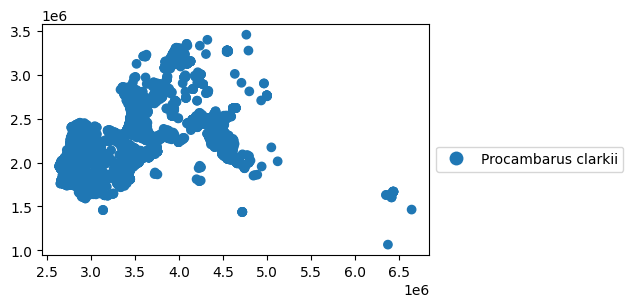

In [26]:
# plot the points geographically by species
fig, ax = plt.subplots(figsize=(5,5))
sp = procambarus.plot(
    column='scientific_name',
    ax=ax,
    legend=True,
    legend_kwds={"bbox_to_anchor": (1, 0.5)}
)

In [27]:
# Load the `.txt` file (assuming tab-separated values)
df = pd.read_csv(r"C:\Users\lenovo\Documents\my_SE_data\procambarus_clarkii\background.txt", sep=" ", header=None, names=["longitude", "latitude"])

# Convert to GeoSeries using elapid
geometry = ela.xy_to_geoseries(x=df["longitude"], y=df["latitude"])

# Create GeoDataFrame
background = gpd.GeoDataFrame(geometry=geometry)

# project coordinates
background = background.to_crs(projected_crs)

print(background.head())

                          geometry
0  POINT (5959323.001 3846879.602)
1  POINT (5825244.774 3796392.317)
2  POINT (5876051.458 3814559.111)
3  POINT (5902677.384 3823363.676)
4  POINT (3266606.661 3662947.511)


In [28]:
#obtain covariates for presence and background points

presence = ela.annotate(
    procambarus.geometry,
    raster_paths,
    drop_na=True,
)

# we'll use the biased sample locations
background = ela.annotate(
    background,
    raster_paths,
    drop_na=True
)

# project the coordinates
projected_crs = "EPSG:3035"
background = background.to_crs(projected_crs)
presence = presence.to_crs(projected_crs)


Raster:   0%|                              | 0/19 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Raster:   0%|                              | 0/19 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

Sample:   0%|                              | 0/6145 [00:00<?, ?it/s]

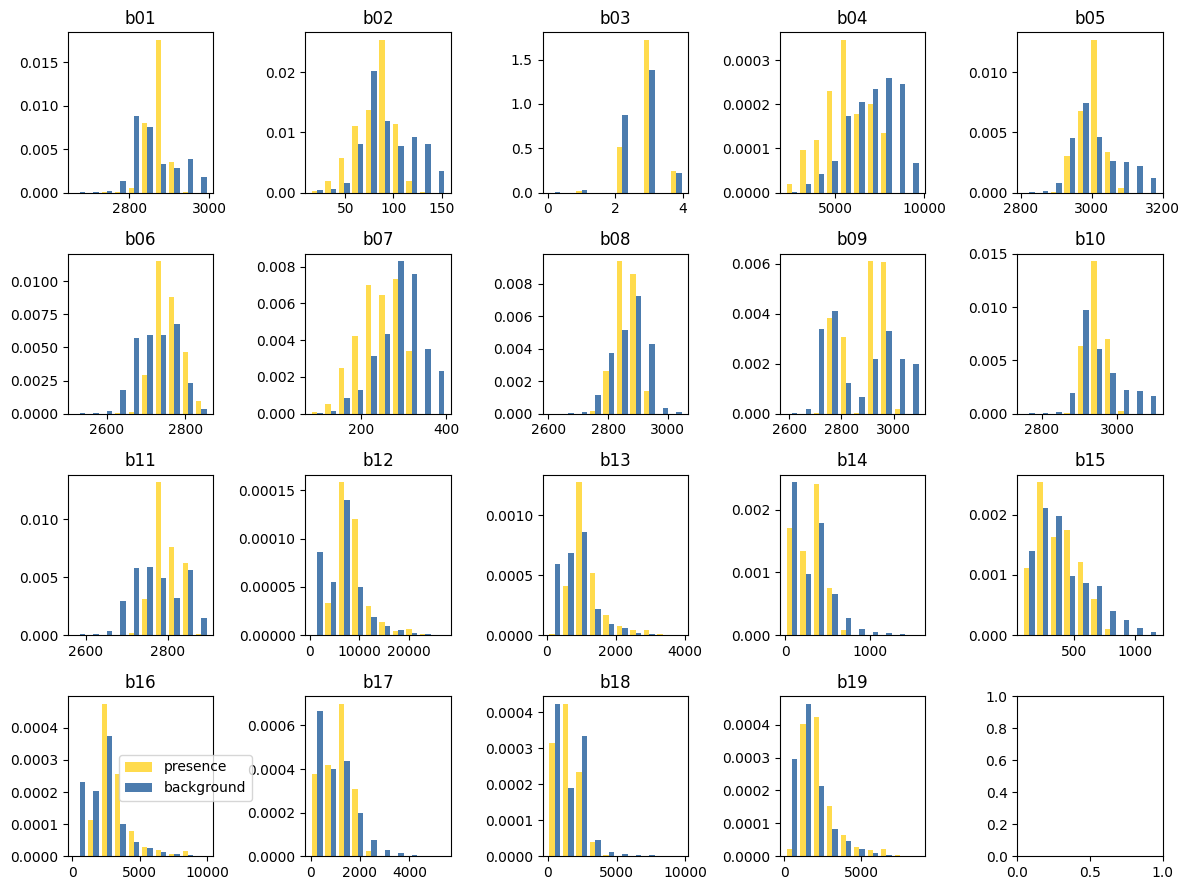

In [29]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(12,9))
labels= background.columns[1:].tolist()

for label, ax in zip(labels, axs.ravel()):
    pvar = presence[label]
    bvar = background[label]
    ax.hist(
        [pvar, bvar],
        density=True,
        alpha=0.7,
        label=['presence', 'background'],
        color= ['#FFCC02', '#00458C']

    )
    ax.set_title(label)

handles, lbls = ax.get_legend_handles_labels()
fig.legend(handles, lbls, loc=(0.1, 0.1))
plt.tight_layout()

<Axes: >

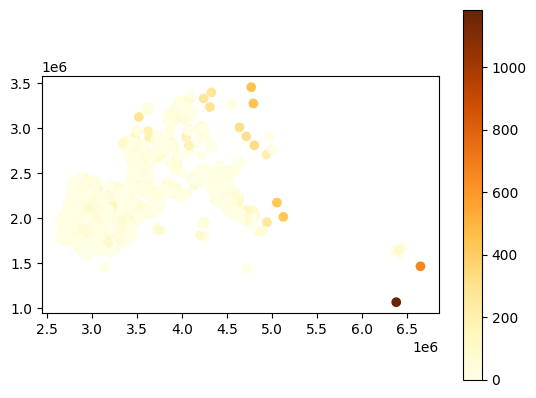

In [30]:
background['SampleWeight'] = ela.distance_weights(background, n_neighbors=1)
presence['SampleWeight'] = ela.distance_weights(presence, n_neighbors=1)
presence.plot(column='SampleWeight', legend=True, cmap='YlOrBr')

In [31]:
merged = ela.stack_geodataframes(
    presence,
    background,
    add_class_label=True,
)
(merged.describe())

,b01,b02,b03,b04,b05,b06,b07,b08,b09,b10,...,b12,b13,b14,b15,b16,b17,b18,b19,SampleWeight,class
count,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,...,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000,11707.000000
mean,2867.543692,87.556334,2.802170,6348.777569,3007.116682,2742.051935,265.064748,2866.739728,2883.513453,2950.134279,...,7490.951397,1003.292560,288.062954,390.521654,2708.667806,1044.797813,1467.776715,2002.720509,4.395847,0.524900
std,42.343416,23.462399,0.601682,1502.826046,53.185343,45.597329,54.902001,44.216912,104.711930,45.018789,...,3799.189524,538.640997,209.837732,195.225629,1454.118747,683.665252,1048.721236,1270.478640,19.505749,0.499401
min,2660.000000,14.000000,0.000000,2207.000000,2805.000000,2514.000000,81.000000,2599.000000,2585.000000,2749.000000,...,147.000000,28.000000,1.000000,76.000000,64.000000,3.000000,3.000000,50.000000,0.000000,0.000000
25%,2836.000000,72.000000,2.000000,5296.000000,2967.000000,2716.000000,226.000000,2839.000000,2788.000000,2917.000000,...,5752.000000,738.500000,89.000000,245.000000,2021.500000,448.500000,527.500000,1232.000000,0.395474,0.000000
50%,2867.000000,87.000000,3.000000,6362.000000,3003.000000,2745.000000,273.000000,2869.000000,2924.000000,2947.000000,...,7264.000000,945.000000,312.000000,345.000000,2580.000000,1091.000000,1480.000000,1768.000000,1.000000,1.000000
75%,2889.000000,102.000000,3.000000,7531.000000,3031.000000,2775.000000,303.000000,2900.000000,2962.000000,2969.000000,...,9192.000000,1209.500000,432.000000,518.000000,3321.500000,1509.000000,2209.000000,2508.000000,2.052337,1.000000
max,2997.000000,154.000000,4.000000,9765.000000,3186.000000,2858.000000,398.000000,3050.000000,3102.000000,3107.000000,...,27381.000000,3951.000000,1586.000000,1190.000000,10068.000000,5464.000000,9820.000000,8841.000000,1184.008064,1.000000


In [18]:
# initialize and print the model defaults
maxent = ela.MaxentModel()
pprint(maxent.get_params())

{'beta_categorical': 1.0,
 'beta_hinge': 1.0,
 'beta_lqp': 1.0,
 'beta_multiplier': 1.5,
 'beta_threshold': 1.0,
 'clamp': True,
 'class_weights': 100,
 'convergence_tolerance': 2e-06,
 'feature_types': ['linear', 'hinge', 'product'],
 'n_cpus': 4,
 'n_hinge_features': 10,
 'n_lambdas': 100,
 'n_threshold_features': 10,
 'scorer': 'roc_auc',
 'tau': 0.5,
 'transform': 'cloglog',
 'use_lambdas': 'best',
 'use_sklearn': True}


In [33]:
# set up the x/y data for model fitting
x = merged.drop(columns=['class', 'SampleWeight'])
y = merged['class']
sample_weight = merged['SampleWeight']

# fit and evaluate the model under naive conditions
maxent.fit(x, y, sample_weight=sample_weight)
ypred = maxent.predict(x)

print(f"Unweighted naive AUC score: {metrics.roc_auc_score(y, ypred):0.3f}")
print(f"Weighted naive AUC score  : {metrics.roc_auc_score(y, ypred, sample_weight=sample_weight):0.3f}")

Unweighted naive AUC score: 0.946
Weighted naive AUC score  : 0.943


<Axes: >

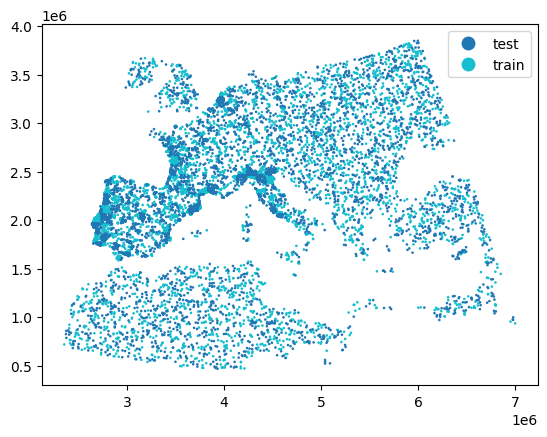

In [42]:
# let's use a 50km grid
grid_size = 100_000
train, test = ela.checkerboard_split(merged, grid_size=grid_size)

# we'll re-merge them for plotting purposes
train['split'] = 'train'
test['split'] = 'test'
checker = ela.stack_geodataframes(train, test)
checker.plot(column='split', markersize=0.75, legend=True)

In [43]:
# set up model fitting
xtrain = train.drop(columns=['class', 'SampleWeight', 'split'])
ytrain = train['class']
sample_weight_train = train['SampleWeight']

xtest = test.drop(columns=['class', 'SampleWeight', 'split'])
ytest = test['class']
sample_weight_test = test['SampleWeight']

maxent.fit(xtrain, ytrain, sample_weight=sample_weight_train)
ypred = maxent.predict(xtest)

print(f"Unweighted checkerboard AUC score: {metrics.roc_auc_score(ytest, ypred):0.3f}")
print(f"Weighted checkerboard AUC score: {metrics.roc_auc_score(ytest, ypred, sample_weight=sample_weight_test):0.3f}")

Unweighted checkerboard AUC score: 0.901
Weighted checkerboard AUC score: 0.834
